Mounted at /content/drive
🔄 Unzipping dataset...
✅ Dataset unzipped
✅ Dataset structure verified
Found 1997 files belonging to 3 classes.
Using 1598 files for training.
Found 1997 files belonging to 3 classes.
Using 399 files for validation.
Found 301 files belonging to 3 classes.
Classes: ['early', 'moderate', 'severe']
Class weights: {0: np.float64(1.076094276094276), 1: np.float64(0.8661246612466125), 2: np.float64(1.0915300546448088)}
111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "ConvNeXt_Severity"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_tiny (Functional)      │ (None, 7, 7, 768)      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 768)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,018,787 (106.88 MB)

 Trainable params: 198,147 (774.01 KB)

 Non-trainable params: 27,820,640 (106.13 MB)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 603ms/step - accuracy: 0.4296 - loss: 1.3552 - val_accuracy: 0.4662 - val_loss: 0.9717
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 408ms/step - accuracy: 0.5336 - loss: 1.0391 - val_accuracy: 0.5489 - val_loss: 0.9102
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.5837 - loss: 0.9927 - val_accuracy: 0.5815 - val_loss: 0.8784
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 407ms/step - accuracy: 0.6144 - loss: 0.9071 - val_accuracy: 0.5890 - val_loss: 0.8627
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 416ms/step - accuracy: 0.6086 - loss: 0.9187 - val_accuracy: 0.6190 - val_loss: 0.8227
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 405ms/step - accuracy: 0.6298 - loss: 0.8355 - val_accuracy: 0.5915 - val_loss: 0.8201
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.6321 - loss: 0.8105 - val_accuracy: 0.6241 - val_loss: 0.7891
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 402ms/step - accuracy: 0.6572 - loss: 0.8015 - val_accu

✅ Test Accuracy: 0.8538205980066446
              precision    recall  f1-score   support

       early       0.86      0.84      0.85        91
    moderate       0.79      0.89      0.83       114
      severe       0.94      0.83      0.88        96

    accuracy                           0.85       301
   macro avg       0.86      0.85      0.86       301
weighted avg       0.86      0.85      0.85       301

Confusion Matrix:
 [[ 76  14   1]
 [  9 101   4]
 [  3  13  80]]
✅ Model saved at: /content/drive/MyDrive/SeverityModels/convnext/convnext_final.keras


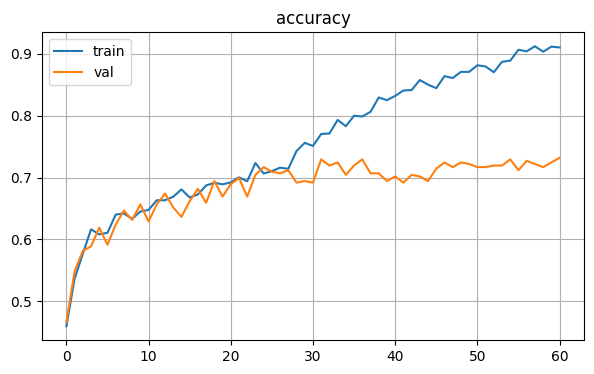

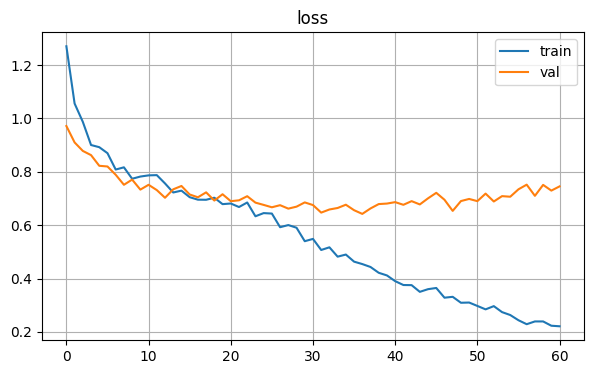

In [ ]:
# ============================================================
# ConvNeXtTiny Severity Classification – FINAL FIXED VERSION
# ============================================================

from google.colab import drive
drive.mount('/content/drive')

# ------------------------------------------------------------
# 1. Paths
# ------------------------------------------------------------
DATASET_ZIP_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset.zip"
DATASET_PATH = "/content/SeverityDataset"
TEST_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset_test"
SAVE_DIR = "/content/drive/MyDrive/SeverityModels/convnext"

import os, zipfile, shutil
os.makedirs(SAVE_DIR, exist_ok=True)

# ------------------------------------------------------------
# 2. Unzip Dataset ONCE (same as other models)
# ------------------------------------------------------------
if not os.path.exists(DATASET_PATH):
    print("🔄 Unzipping dataset...")
    with zipfile.ZipFile(DATASET_ZIP_PATH, "r") as z:
        z.extractall("/content")
    print("✅ Dataset unzipped")

# Verify class folders
for cls in ["early", "moderate", "severe"]:
    if not os.path.isdir(os.path.join(DATASET_PATH, cls)):
        raise FileNotFoundError(f"❌ Missing class folder: {cls}")

print("✅ Dataset structure verified")

# ------------------------------------------------------------
# 3. Imports & Hyperparameters
# ------------------------------------------------------------
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

HEAD_EPOCHS = 25
FT_EPOCHS = 35
LR_HEAD = 1e-4
LR_FT = 2e-5

# ------------------------------------------------------------
# 4. Datasets
# ------------------------------------------------------------
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_PATH,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode="int"
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# ------------------------------------------------------------
# 5. Class Weights (important for severity imbalance)
# ------------------------------------------------------------
y_train = np.concatenate([y.numpy() for _, y in train_ds], axis=0)
weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
print("Class weights:", class_weights)

# ------------------------------------------------------------
# 6. Augmentation & Preprocessing
# ------------------------------------------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.12),
    layers.RandomZoom(0.12),
])

def train_preprocess(x, y):
    x = tf.cast(x, tf.float32)
    x = data_augmentation(x, training=True)
    x = tf.keras.applications.convnext.preprocess_input(x)
    return x, y

def eval_preprocess(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.convnext.preprocess_input(x)
    return x, y

train_ds = train_ds.map(train_preprocess, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(eval_preprocess, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(eval_preprocess, num_parallel_calls=AUTOTUNE)

# ------------------------------------------------------------
# 7. Build ConvNeXtTiny Model
# ------------------------------------------------------------
base = tf.keras.applications.ConvNeXtTiny(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base.trainable = False

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.35)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs, outputs, name="ConvNeXt_Severity")
model.summary()

# ------------------------------------------------------------
# 8. Train Head
# ------------------------------------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR_HEAD),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=HEAD_EPOCHS,
    class_weight=class_weights
)

# ------------------------------------------------------------
# 9. Fine-Tuning
# ------------------------------------------------------------
base.trainable = True
for layer in base.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(LR_FT),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=HEAD_EPOCHS + FT_EPOCHS,
    initial_epoch=history_head.epoch[-1],
    class_weight=class_weights
)

# ------------------------------------------------------------
# 10. Evaluation
# ------------------------------------------------------------
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

print("✅ Test Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ------------------------------------------------------------
# 11. Save Model
# ------------------------------------------------------------
final_path = os.path.join(SAVE_DIR, "convnext_final.keras")
model.save(os.path.join(SAVE_DIR, "ConvNeXt_Severity.h5"))
model.save(final_path)
print("✅ Model saved at:", final_path)

# ------------------------------------------------------------
# 12. Training Curves
# ------------------------------------------------------------
def plot_history(h1, h2, metric):
    train = h1.history[metric] + h2.history.get(metric, [])
    val = h1.history["val_" + metric] + h2.history.get("val_" + metric, [])
    plt.figure(figsize=(7,4))
    plt.plot(train, label="train")
    plt.plot(val, label="val")
    plt.title(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_head, history_ft, "accuracy")
plot_history(history_head, history_ft, "loss")
